In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Assuming 'data' is your DataFrame
# Replace it with your actual dataset or data loading code
data = pd.read_csv('data_uas.csv', sep=',', header=0, engine='python', encoding='utf-8')


In [3]:
# Soal A
# Descriptive statistics
descriptive_stats = data.describe()

# Display the results
print(descriptive_stats)

# Interpretasi
print("\nInterpretasi Statistik Deskriptif:")
print("===================================")

# Hari (Day)
print("\nHari (Day):")
print("Data ini mencakup 548 observasi dengan nilai rata-rata hari sebesar {:.2f}.".format(descriptive_stats.loc['mean', 'Day']))

# Interaksi (Interaction)
print("\nInteraksi (Interaction):")
print("Variabel interaksi memiliki nilai rata-rata {:.2f} dengan deviasi standar {:.2f}.".format(descriptive_stats.loc['mean', 'Interaction'], descriptive_stats.loc['std', 'Interaction']))

# Tempat Tinggal (Residences)
print("\nTempat Tinggal (Residences):")
print("Variabel Tempat Tinggal memiliki total 704 dengan nilai rata-rata {:.2f}.".format(descriptive_stats.loc['mean', 'Residences']))

# Pengetahuan (Knowledge)
print("\nPengetahuan (Knowledge):")
print("Variabel Pengetahuan memiliki nilai rata-rata {:.2f} dengan deviasi standar {:.2f}.".format(descriptive_stats.loc['mean', 'Knowledge'], descriptive_stats.loc['std', 'Knowledge']))

# Curah Hujan (Rainfall)
print("\nCurah Hujan (Rainfall):")
print("Variabel Curah Hujan memiliki nilai minimum {:.2f} dan nilai maksimum {:.2f}.".format(descriptive_stats.loc['min', 'Rainfall'], descriptive_stats.loc['max', 'Rainfall']))

# Kelembaban (%) (Humidity (%))
print("\nKelembaban (%):")
print("Variabel Kelembaban memiliki nilai rata-rata {:.2f} dengan deviasi standar {:.2f}.".format(descriptive_stats.loc['mean', 'Humidity (%)'], descriptive_stats.loc['std', 'Humidity (%)']))

# Suhu (Temperature)
print("\nSuhu (Temperature):")
print("Variabel Suhu memiliki nilai rata-rata {:.2f} dengan deviasi standar {:.2f}.".format(descriptive_stats.loc['mean', 'Temperature'], descriptive_stats.loc['std', 'Temperature']))

# Daya (Power)
print("\nDaya (Power):")
print("Variabel Daya memiliki nilai rata-rata {:.2f} dan nilai maksimum {:.2f}.".format(descriptive_stats.loc['mean', 'Power'], descriptive_stats.loc['max', 'Power']))

print("\n")

             Day  Interaction  Residences   Knowledge    Rainfall  \
count  547.00000   547.000000  547.000000  547.000000  547.000000   
mean   274.00000    19.908592    6.837294   21.036563   23.371115   
std    158.04957     5.106455    1.774111    5.465722    4.223964   
min      1.00000     6.000000    2.000000    7.000000   16.000000   
25%    137.50000    16.000000    5.000000   17.000000   20.000000   
50%    274.00000    21.000000    7.000000   21.000000   22.000000   
75%    410.50000    24.000000    8.000000   25.000000   27.500000   
max    547.00000    30.000000   10.000000   35.000000   31.000000   

       Humidity (%)  Temperature         Power  
count    547.000000   547.000000    547.000000  
mean      81.023766    20.804388   7403.159963  
std       12.453333     8.281458   5693.996608  
min       55.000000    10.000000    110.000000  
25%       70.000000    10.000000   3753.000000  
50%       80.000000    20.000000   6790.000000  
75%       90.000000    30.000000   

In [4]:
# Soal B
# Check validity and reliability (example: using correlation matrix)
correlation_matrix = data.corr()

# Display the correlation matrix
print("\nMatrix Korelasi:")
print(correlation_matrix)


Matrix Korelasi:
                   Day  Interaction  Residences  Knowledge  Rainfall  \
Day           1.000000    -0.041994    0.038198   0.048443 -0.087156   
Interaction  -0.041994     1.000000    0.250860   0.601927 -0.013878   
Residences    0.038198     0.250860    1.000000   0.242755  0.015893   
Knowledge     0.048443     0.601927    0.242755   1.000000 -0.081585   
Rainfall     -0.087156    -0.013878    0.015893  -0.081585  1.000000   
Humidity (%)  0.051174    -0.052095   -0.004881   0.025011 -0.862187   
Temperature  -0.129462     0.032925    0.045075   0.014725  0.681525   
Power         0.050903     0.388109    0.224459   0.330251 -0.001732   

              Humidity (%)  Temperature     Power  
Day               0.051174    -0.129462  0.050903  
Interaction      -0.052095     0.032925  0.388109  
Residences       -0.004881     0.045075  0.224459  
Knowledge         0.025011     0.014725  0.330251  
Rainfall         -0.862187     0.681525 -0.001732  
Humidity (%)      1.0

In [5]:
# Soal C
# Descriptive statistics for specific columns
power_stats = data['Power'].describe()
humidity_stats = data['Humidity (%)'].describe()
rainfall_stats = data['Rainfall'].describe()

# Display the results
print("\nPower Stats:", power_stats)
print("\n")
print("Humidity Stats:", humidity_stats)
print("\n")
print("Rainfall Mean:", rainfall_stats)


Power Stats: count      547.000000
mean      7403.159963
std       5693.996608
min        110.000000
25%       3753.000000
50%       6790.000000
75%       9393.500000
max      33550.000000
Name: Power, dtype: float64


Humidity Stats: count    547.000000
mean      81.023766
std       12.453333
min       55.000000
25%       70.000000
50%       80.000000
75%       90.000000
max      100.000000
Name: Humidity (%), dtype: float64


Rainfall Mean: count    547.000000
mean      23.371115
std        4.223964
min       16.000000
25%       20.000000
50%       22.000000
75%       27.500000
max       31.000000
Name: Rainfall, dtype: float64


Skewness - Day :  0.0
Skewness - Interaction :  -0.36250952443610446
Skewness - Residences :  -0.3262597188495562
Skewness - Knowledge :  -0.0577873577724431
Skewness - Rainfall :  0.27416643078483877
Skewness - Humidity (%) :  -0.1928296587692331
Skewness - Temperature :  -0.1505631813099552
Skewness - Power :  1.364936797108236


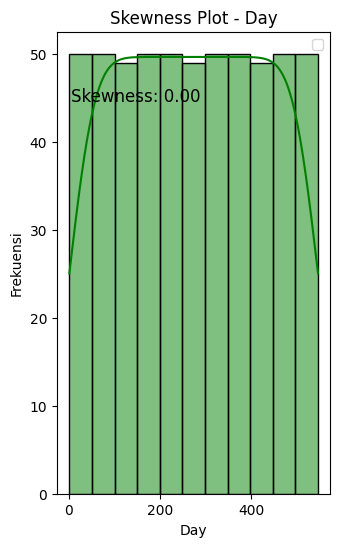

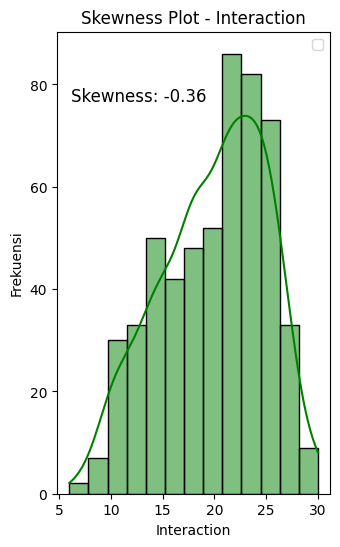

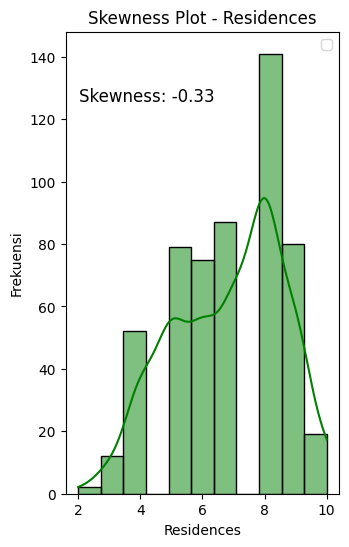

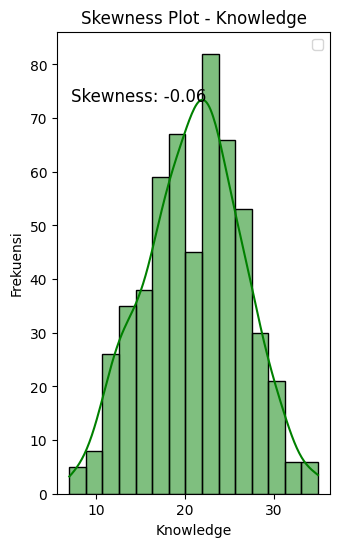

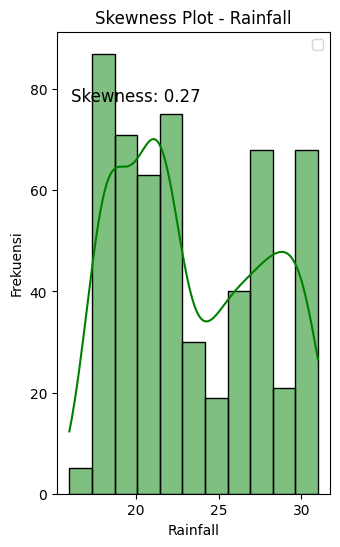

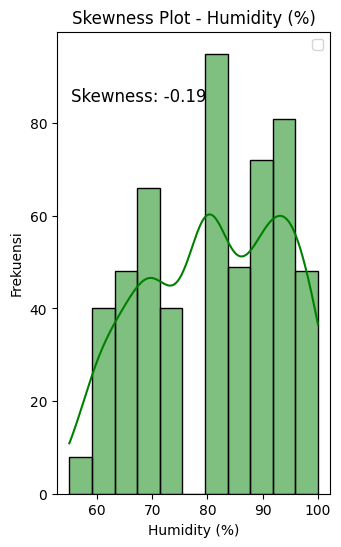

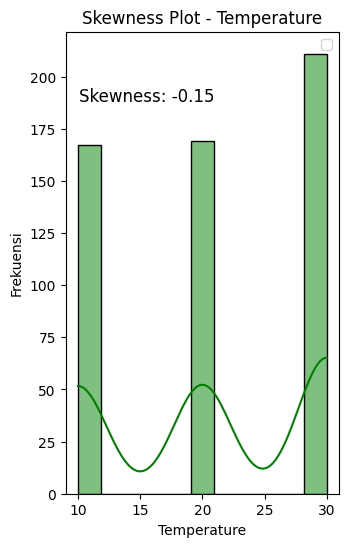

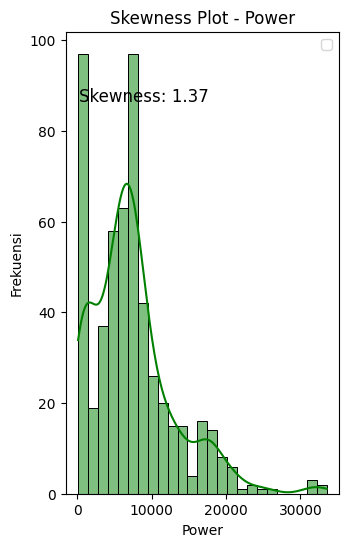

In [6]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)


# Soal D

data = data.dropna()

numeric_columns = data.select_dtypes(include=[float, int]).columns

for column in numeric_columns:
    skewness_value = data[column].skew()

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    sns.histplot(data[column], kde=True, color='green', edgecolor='black')
    plt.annotate(f'Skewness: {skewness_value:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)
    plt.title(f'Skewness Plot - {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.legend()

# Compute skewness
for column in data:
    print(f"Skewness - {column} : ", (skew(data[column])))

In [7]:
# Soal E
# Standardize data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

print(data_standardized)
# Use data_standardized for further analysis

[[-1.72888724  0.21392664  0.65597345 ...  0.72144942 -0.09722006
  -0.14645646]
 [-1.72255432  1.5859955   0.65597345 ...  0.72144942 -0.09722006
   2.47167523]
 [-1.7162214   0.40993648  0.65597345 ... -0.48414987  1.11140207
  -0.62669923]
 ...
 [ 1.7162214  -0.37410287  0.65597345 ... -0.48414987 -1.3058422
  -1.2626869 ]
 [ 1.72255432 -2.33420124  1.22015186 ...  0.72144942 -1.3058422
  -1.05596454]
 [ 1.72888724  0.99796599 -1.60074023 ...  1.12331585 -1.3058422
  -0.58626883]]


In [8]:
# Soal F
# Simple linear regression
X = sm.add_constant(data[['Day','Interaction','Residences','Knowledge','Rainfall','Humidity (%)','Temperature' ]])
y = data['Power']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Power   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     17.26
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.17e-20
Time:                        14:12:24   Log-Likelihood:                -5450.4
No. Observations:                 547   AIC:                         1.092e+04
Df Residuals:                     539   BIC:                         1.095e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2145.6389   5453.525     -0.393   

In [9]:
# Soal G
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Power   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     17.26
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.17e-20
Time:                        14:12:26   Log-Likelihood:                -5450.4
No. Observations:                 547   AIC:                         1.092e+04
Df Residuals:                     539   BIC:                         1.095e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2145.6389   5453.525     -0.393   

In [10]:
# Soal H
#Uji Kebaikan Model menggunakan R-squared
r_squared = model.rsquared
print(f"\nR-Squared (Koefisien Determinasi) untuk model dengan 10 variabel numerik:")
print(f"R-Squared: {r_squared}")


R-Squared (Koefisien Determinasi) untuk model dengan 10 variabel numerik:
R-Squared: 0.1830860152602115
